# Tick Formatters

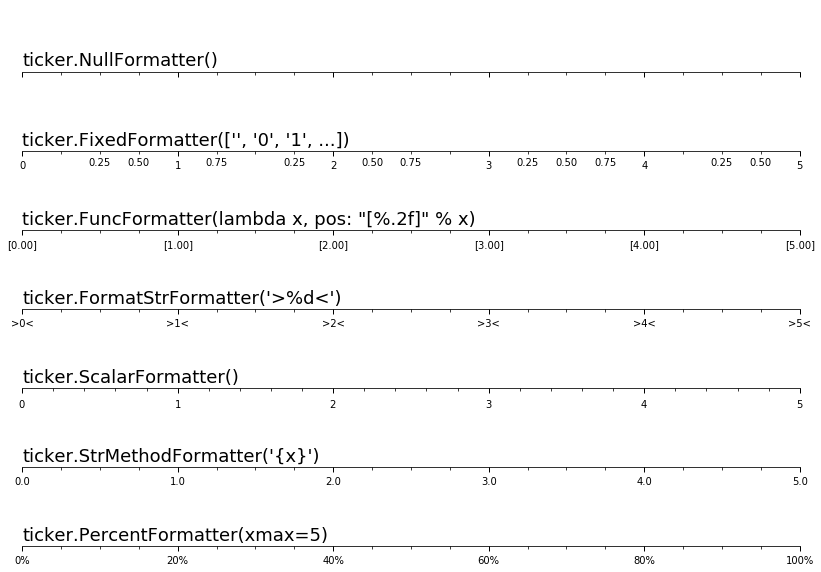

In [1]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


fig = plt.figure(figsize=(12, 7.5))
fig.patch.set_alpha(0.0)
n = 7

fontsize = 18
family = "DejaVu Sans"

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "ticker.NullFormatter()", family=family,
        fontsize=fontsize, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "ticker.FixedFormatter(['', '0', '1', ...])",
        family=family, fontsize=fontsize, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'ticker.FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        family=family, fontsize=fontsize, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "ticker.FormatStrFormatter('>%d<')",
        family=family, fontsize=fontsize, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ticker.ScalarFormatter()",
        family=family, fontsize=fontsize, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "ticker.StrMethodFormatter('{x}')",
        family=family, fontsize=fontsize, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.0, 0.1, "ticker.PercentFormatter(xmax=5)",
        family=family, fontsize=fontsize, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

# plt.savefig("../figures/tick-formatters.pdf", transparent=True)
plt.show()